$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Práctica nº 2. Matemáticas I de Ingeniería Informática

En esta práctica vamos a realizar ejercicios correspondientes a las primeras clases de la asignatura. Algunos consistirán en repasar o incidir en cuestiones tratadas en la práctica anterior como resolución de ecuaciones e inecuaciones. Contenido:

-   Igualdades y desigualdades
-   Listas: sucesiones

**Nota:** Cuando estemos trabajando con expresiones simbólicas, los siguientes comandos pueden ser de utilidad **simplify**, **expand** (ejecuta multiplicaciones y potencias para convertir la expresión en una suma desarrollada), **factor** (si la expresión es un polinomio, lo factoriza, es decir, intenta expresarlo como productos) y **full_simplify** (aplica varios métodos de simplificación y devuelve la expresión más corta). Esta última función tiene sólo la sintaxis expresion.full_simplify(). Observar los siguientes ejemplos:

In [52]:
var('y')
show(simplify((x+y)^2))
show(expand((x+y)^2))

(x + y)^2

x^2 + 2*x*y + y^2

In [14]:
((x+y)^2).full_simplify()

x^2 + 2*x*y + y^2

In [15]:
factor(x^2+y^2+2*x*y)

(x + y)^2

## 1. Ecuaciones, desigualdades y sistemas de ecuaciones o desigualdades

Las órdenes que usamos son:

-   reset , var , assume .
-   solve, to_poly_solve=True. Con esta orden resolvemos ecuaciones, desigualdades y sistemas de ecuaciones o desigualdades.
-   plot , con las opciones figsize , ymax , ymin . Con esta orden representamos gráficas de funciones.
-   point , con las opciones size , color= . Para dibujar un conjunto de puntos $(x_1,y_1)$, ..., $(x_n,y_n)$ en el plano.
-   rhs , aplicado a una ecuación a==b , devuelve el lado izquierdo, es decir, b .

**Ejemplo 1.** Resolver la desigualdad $\frac{2x-1}{3x+2} \leq 1$.

In [16]:
solve((2*x-1)/(3*x+2)<=1,x,to_poly_solve=True)

[[x <= -3], [x > (-2/3)]]

La solución es clara: es una lista de dos elementos que a su vez son listas. En estas dos listas observamos las condiciones $x\leq -3$ y $x>-2/3$. Es decir, la solución es la unión de intervalos $(-\infty,-3]\cup (-2/3,\infty)$. Podemos extraer las dos listas así:

In [5]:
s=solve((2*x-1)/(3*x+2)<=1,x,to_poly_solve=True)
print(s[0])
print(s[1])

[x <= -3]
[x > (-2/3)]


Vamos a comprobar gráficamente que la solución es correcta. Para ello, dibujaremos la función $f(x)=\frac{2x-1}{3x+2}-1$ y veremos cuando $f(x)\leq 0$. Vamos a dibujar, por ejemplo, en el intervalo $[-5,5]$. Algún problema vamos a tener porque cuando $x=-2/3$ es $3x+2=0$ y $f(x)$ no está definida y cerca de este punto los valores de $f(x)$ son muy grandes (hay una asíntota en $x=-2/3$). Por ello nos encontramos con el siguiente resultado:

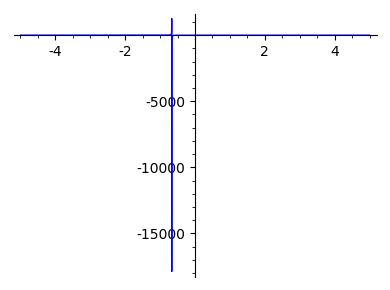

In [6]:
plot((2*x-1)/(3*x+2)-1,(x,-5,5),figsize=4)

Cuando nos alejamos algo de $-2/3$ los valores de la función son muy pequeños comparados con los valores muy próximos a $-2/3$. Observar los valores que nos indica en el eje $OY$. Esto lo podemos arreglar pidiendo que no dibuje valores de $f(x)$ que se salgan de un rango que indicamos con ymax e ymin. En este caso elegimos los valores $6$ y $-6$ :

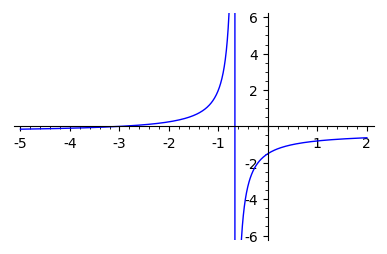

In [7]:
plot((2*x-1)/(3*x+2)-1,(x,-5,2),figsize=4,ymax=6,ymin=-6)

La linea vertical dibujada es la asíntota $x=-2/3$. Está gráfica parece que basta para indicarnos que $f(x)$ es efectivamente negativa (está por debajo del eje $OX$) desde $x=-3$ para atrás y desde $x=-2/3$ en adelante. Si alguien dudara se puede hacer una gráfica en torno a $-3$

Ejemplo 2. Resolver la desigualdad $|17-2x^4| \leq 15$.

In [8]:
solve(abs(17-2*x**4)<=15,x,to_poly_solve=True)

[[x == -2, 15 == 0],
 [x == 2, 15 == 0],
 [x == -2, 15 > 0],
 [x == 2, 15 > 0],
 [x == -1, 15 > 0],
 [x == 1, 15 > 0],
 [1 < x, x < 2],
 [-2 < x, x < -1]]

Ahora, la solución no es tan clara pues vemos cosas extrañas como la lista interior \[x==2,15==0\] y la expresión 15==0 parece absurda. Sin embargo, la lista \[1&lt;x,x&lt;2\] que indica el intervalo $(1,2)$ parece coherente. Vamos a cambiar la perspectiva y hacer la gráfica de $|17-2x^4|-15$. Después de algunos intentos nos decantamos por dibujar en el intervalo $[-5/2,5/2]$ :

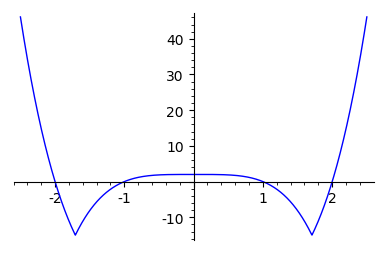

In [9]:
plot(abs(17-2*x**4)-15,(x,-2.5,2.5),figsize=4)

Observamos que $f(x)\leq 0$ en la unión de intervalos $[-2,-1]\cup[1,2]$. Y, con un poco de paciencia, podemos desentrañar que ésta es exactamente la solución que Sage nos ha dado con la orden solve.

La confusa respuesta de Sage proviene probablemente del cálculo con valores absolutos. Nosotros con nuestros conocimientos teóricos podemos evitar los valores absolutos. En efecto, sabemos que $|a|\leq 15$ si y solo $-15\leq a\leq 15$. Entonces nuestra desigualdad $|f(x)|\leq 15$ equivale a resolver las dos desigualdades $-15\leq f(x)$ y $f(x)\leq 15$. La orden solve también resuelve sistemas de ecuaciones o inecuaciones; sólo hay que conocer la sintaxis: las ecuaciones se ponen en una lista (entre corchetes y separadas por comas):

In [10]:
solve([-15<=17-2*x**4,17-2*x**4<=15],x,to_poly_solve=True)

[[-2 < x, x < -1], [1 < x, x < 2], [x == -2], [x == -1], [x == 1], [x == 2]]

Aquí vemos claramente la solución: las listas interiores indican respectivamente el intervalo $(-2,-1)$, el intervalo $(1,2)$, el punto $-2$, el punto $-1$, el punto $1$ y el punto $2$. Uniéndolo todo tenemos $[-2,-1]\cup[1,2]$ 

**NOTA IMPORTANTE.** La orden plot la usamos para hacer gráficas de funciones y nada más. No tiene sentido hacer la gráfica de una ecuación o de una desigualdad. Así, en estos ejemplos anteriores es un grave error escribir cosas como plot(abs((x-1)\*(x-2))==3,x), plot(abs(17-2\*x\*\*4)&lt;=15,x) y similares; aunque a veces no dé mensaje de error nunca sabremos qué significa la respuesta.

## 2. Listas: sucesiones.

Una lista para Sage es una colección de objetos (que pueden ser números, variables, igualdades, textos y más cosas) que están entre corchetes \[ \] y separados por comas. El uso de las listas puede ser muy útil y además Sage devuelve muchos resultados en forma de listas.


In [11]:
[3,7,x^2,"tercero",x^2==49,25] # esto es una lista de 6 elementos

[3, 7, x^2, 'tercero', x^2 == 49, 25]

Para recuperar el elemento $k$-ésimo de una lista L, la sintaxis es L\[k\], teniendo en cuenta que se empieza a numerar por $k=0$. No parece muy lógico que el primer elemento de la lista sea el $0$-ésimo, pero en algunos problemas presenta ventajas y de hecho, muchas aplicaciones utilizan esta numeración.

In [12]:
L=[3,7,x^2,"tercero",y^2==49,25]
L[0]; L[2]; L[3]; L[4];L[6] # el mensaje de error para L[6] es claro

IndexError: list index out of range

> Resaltamos algunas de las órdenes que usaremos:

-   \[n0..n1\] donde $n0$ y $n1$ son números enteros crea la lista de los números enteros \[n0,n0+1,n0+2,n0+3,...,n1\].
-   list.append(a) modifica la lista "list" añadiéndole al final el elemento "a".
-   point([(n,a(n)) for n in [1..n0]]) dibuja los puntos con coordenadas X: 1,2,..., n0 y coordenadas Y: a(1), a(2),..., a(n0).
-   limit(a(n),n=oo) calcula el límite de "a(n)" cuando n tiende a infinito. Se puede escribir 'lim' en vez de 'limit'.
-   sum(a(n),n,n0,n1) calcula la suma de 'a(n') con n desde n0 hasta n1, pudiendo ser n1= $\infty$.

Observad la siguientes respuestas:

In [18]:
print [1..10]
print [35..50]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


Con estas simples listas podemos formar una nueva lista con un número finito de términos de una sucesión arbitraria. Lo explicamos con un primer ejemplo: consideremos la sucesión $a(n)=\sin \frac{n\pi}{8}$ y formemos una lista con sus diez primeros términos. Es así de fácil:

In [19]:
[sin(n*pi/8) for n in [1..10]]

[1/2*sqrt(-sqrt(2) + 2),
 1/2*sqrt(2),
 1/2*sqrt(sqrt(2) + 2),
 1,
 1/2*sqrt(sqrt(2) + 2),
 1/2*sqrt(2),
 1/2*sqrt(-sqrt(2) + 2),
 0,
 -1/2*sqrt(-sqrt(2) + 2),
 -1/2*sqrt(2)]

Los valores de la función seno, cuando los ha sabido hallar, los ha puesto. Si queremos hacer una lista de, por ejemplo, los 100 primeros términos, va a resultar incómodo ver el resultado en pantalla. Aquí nos puede ser muy útil la orden point que dibuja en un plano coordenado los puntos $(n,a(n))$. Es decir los pares $(1,a(1))$, $(2,a(2))$, $(3,a(3))$, ... y así hasta el lugar que indiquemos.

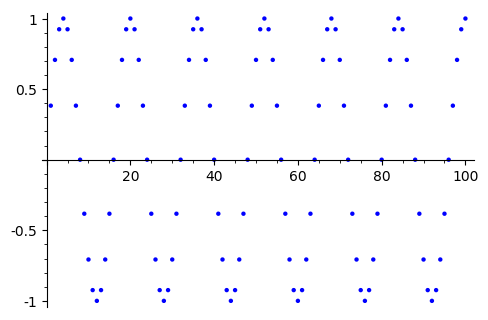

In [20]:
L=[(n,sin(n*pi/8)) for n in [1..100]] # muy incómodo de ver en pantalla
point(L,figsize=5)

Aquí vemos mucha información sobre la sucesión. Por ejemplo que se repite cada $16$ términos (y es que efectivamente $a(n)=a(n+16)$ por la periodicidad de la función seno). También vemos que el término de la sucesión $a(41)$ es un valor cercano a $-0.4$. Comprobémoslo:

In [24]:
show(sin(41*pi/8).n())
(sin(n*pi/8)-sin((n+16)*pi/8)).full_simplify()

-0.382683432365090

0

Una forma más organizada de introducir términos de la sucesión es usando la sintaxis de funciones. Aquí no hace falta declarar n como variable, aunque muchas veces lo haremos.

In [25]:
a(n)=sin(n*pi/8)
L=[(n,a(n)) for n in [1..100]] # misma lista anterior

In [26]:
a(41).n() # así resulta más cómodo hallar valores particulares

-0.382683432365090

Veamos algunos ejemplos de cálculo de límites de sucesiones:

**Ejemplo 1.** Calcular el límite de la sucesión $\displaystyle a_n=1+\frac{e^n}{n!}\, \sin(n)$ y corroborar el resultado con gráficas.

In [27]:
reset()
n=var('n')
a(n)=1+(e^n)/factorial(n)*sin(n)
show(a(n))

e^n*sin(n)/factorial(n) + 1

La ordenlimit(a(n),n=oo) (infinito se introduce en Sage con dos oes minúsculas) halla, si puede, el valor del límite de $a(n)$ cuando n tiende a $\infty$.

In [28]:
limit(a(n),n=oo)

1

Con el siguiente dibujo queda claro que los términos de $a(n)$ cuando $n$ crece se acercan al valor $1$ y además muy rápidamente; el término $a(10)$ ya está muy pegado a $1$ :

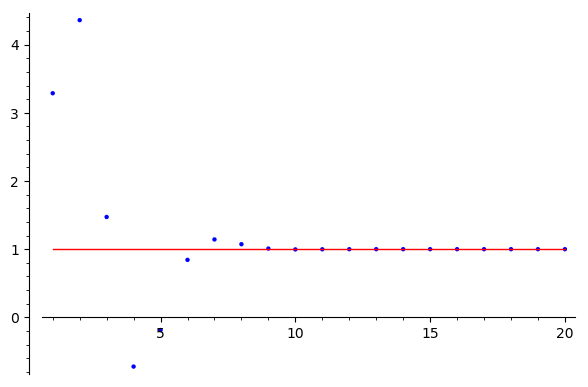

In [29]:
ga=point([(n,a(n)) for n in [1..20]])
gl=plot(1,(x,1,20),color='red') # dibujo de la recta y=1
show(ga+gl)

Veamos que para graficar dos funciones juntas, creamos dos gráficas distintas con sus respectivos comandos plot, y después ejecutamos la orden show con la suma de ambas gráficas.

Aquí van otras evidencias numéricas, el término a(30) no es $1$ pero hacen falta más dígitos para detectarlo:

In [38]:
show(a(10).n())
show(a(20).n())
show(a(30).n())
a(30).n(digits=50)

0.996697844358836

1.00000000018206

1.00000000000000

0.99999999999999999996019430348805073916537586158864

**Ejemplo 2.** Calcular el límite de la sucesión $\displaystyle a_n= \frac{(\sqrt{2n} + n )^3-n^3}{n^2-2\sqrt{n^5}}$. Representarla y compararla con su límite.


In [39]:
reset()
var('n')
a(n)=((sqrt(2*n)+n)^3-n^3)/(n^2-2*sqrt(n^5))
show(a(n))
L=limit(a(n),n=oo)
show(L)

((sqrt(2)*sqrt(n) + n)^3 - n^3)/(n^2 - 2*sqrt(n^5))

-3/2*sqrt(2)

Dibujamos los $100$ primeros términos de la sucesión y el límite. 

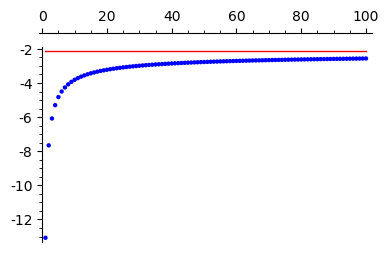

In [40]:
ga=point([(n,a(n)) for n in [1..100]],figsize=4)
gL=plot(L,(x,1,100),color='red',figsize=4)
show(ga+gL)

Como se puede apreciar la convergencia es en este caso bastante más lenta que en el problema anterior. Si consideramos más términos de la sucesión nos acercamos más al límite:

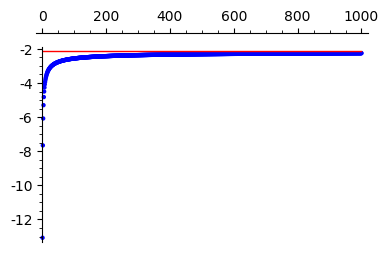

In [41]:
ga2=point([(n,a(n)) for n in [1..1000]])
gL2=plot(L,(x,1,1000),color='red')
show(ga2+gL2,figsize=4)

**Ejemplo 3.** Representar la sucesión $a_n= \sin\sqrt {n+1}-\sin\sqrt {n}$. Estudiar su convergencia.

In [42]:
reset()
n=var('n')
a(n)=sin(sqrt(n+1))-sin(sqrt(n))
show(a(n))

sin(sqrt(n + 1)) - sin(sqrt(n))

In [43]:
limit(a(n),n=oo)

ind

No ha sabido hacer el límite. Si el límite existe, le tendremos que ayudar a obtenerlo. Para tener un indicio de si existe o no, dibujamos unos cuantos términos:

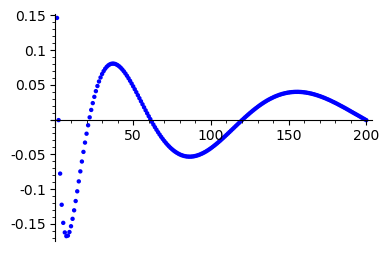

In [44]:
point([(n,a(n)) for n in [1..200]],figsize=4)

No queda del todo claro. Hay oscilaciones cada vez más pequeñas hacia $0$. Dibujamos más términos:

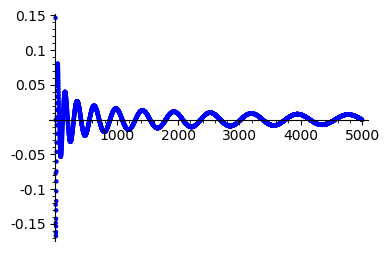

In [45]:
point([(n,a(n)) for n in [1..5000]],figsize=4)

Apreciamos que las ondas cada vez tienen menos altura. El límite puede ser $0$ (aunque también podría ser que no existiera). Una forma de ayudar a que Sage lo encuentre es modificando $a_n$ por relaciones trigonométricas. Por ejemplo, podemos intentar usar la fórmula $\displaystyle \sin(A)-\sin(B)=2\cos(\frac{A+B}{2})\sin(\frac{A-B}{2})$.

In [46]:
a(n)=2*cos((sqrt(n+1)+sqrt(n))/2)*sin((sqrt(n+1)-sqrt(n))/2)
show(a(n))

2*cos(1/2*sqrt(n + 1) + 1/2*sqrt(n))*sin(1/2*sqrt(n + 1) - 1/2*sqrt(n))

In [47]:
limit(a(n),n=oo) # Ahora sí sabe hacerlo

0

**Ejemplo 4.** **(Sucesión recurrente)**

Sea la sucesión dada por $a_1=\sqrt{2}$, $\quad a_2=\sqrt{2+\sqrt{2}}$, $\quad a_3=\sqrt{2+\sqrt{2+\sqrt{2}}}, \dots$. Hallar su límite.

In [ ]:
reset()

La sucesión responde a la regla $a_n=\sqrt{2+a_{n-1}}$, con $a_1=\sqrt{2}$. Construiremos una lista con unos cuantos términos de la sucesión y los dibujaremos para hacernos una idea de su comportamiento. Para crear esta lista, formamos una con el primer elemento y con append, vamos añadiendo elementos de uno en uno:

In [48]:
a=[sqrt(2)]
a.append(sqrt(2+a[0]))
show(a)

[sqrt(2), sqrt(sqrt(2) + 2)]

In [49]:
a.append(sqrt(2+a[1]))
show(a)

[sqrt(2), sqrt(sqrt(2) + 2), sqrt(sqrt(sqrt(2) + 2) + 2)]

Es claro que si queremos los primeros 30 términos, no podemos seguir así. Afortunadamente un sencillo bucle (es importante la indentación), nos resuelve el problema. Al final del bucle, no decimos que nos enseñe estos 30 primeros términos, porque saldrán multitud de radicandos (observar cómo es el término $a[11]$, que se corresponde en Sage con $a[10]$). Mejor los dibujamos:

sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2)

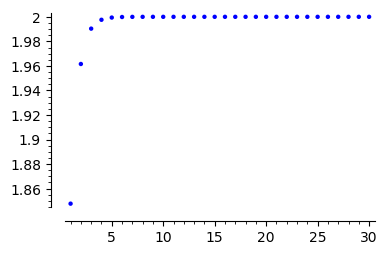

In [50]:
reset()
a=[sqrt(2)]
for n in [1..30]:
     a.append(sqrt(2+a[n-1]))
a[10].show()    
point([(n,a[n]) for n in [1..30]],figsize=4)
### nota que escribimos a[n] en vez de a[n] porque en este caso tenemos una lista, no una función

Esto nos sugiere que la sucesión es creciente y su límite está cerca de 2. Para hallar con rigor este valor, la mayor parte de la tarea nos corresponde a nosotros.  Observamos primero que hay una función $f(x)=\sqrt{2+x}$ que nos permite escribir la recurrencia como $f(a_{n-1})=a_n$. Si $a_{n}$ tuviera límite $L$, como $\lim a_n=\lim a_{n-1}=L$, tendría que cumplirse $f(L)=L$. Por tanto, buscamos los valores que cumplen esta ecuación:

In [51]:
f(x)=sqrt(2+x)
var('L')
solve(L==f(L),L,to_poly_solve=True)

[L == 2]

Esto significa que si la sucesión converge, converge a 2. La gráfica sugiere que $a_n$ es una sucesión creciente y acotada por $2$ (y toda sucesión creciente y acotada tiene límite). Nos quedaría, ya sin Sage, la tarea de demostrar (por inducción) que efectivamente $a_n$ es creciente y acotada.